In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10069 entries, 0 to 10068
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   img                10069 non-null  object 
 1   category           10069 non-null  object 
 2   img_size           10069 non-null  object 
 3   2d_keypoints       10069 non-null  object 
 4   mask               10069 non-null  object 
 5   img_source         10069 non-null  object 
 6   model              10069 non-null  object 
 7   model_raw          1547 non-null   object 
 8   model_source       10069 non-null  object 
 9   3d_keypoints       10069 non-null  object 
 10  voxel              10069 non-null  object 
 11  rot_mat            10069 non-null  object 
 12  trans_mat          10069 non-null  object 
 13  focal_length       10069 non-null  float64
 14  cam_position       10069 non-null  object 
 15  inplane_rotation   10069 non-null  float64
 16  truncate

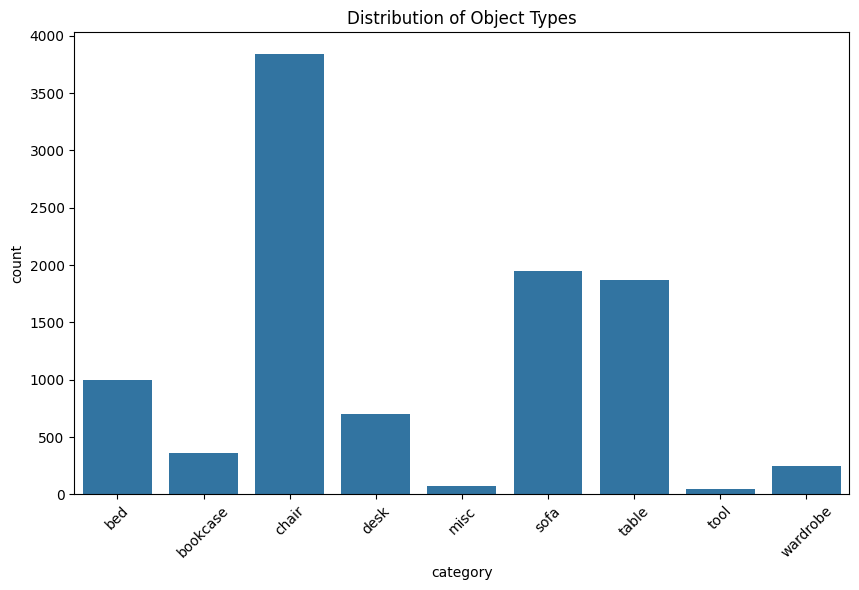

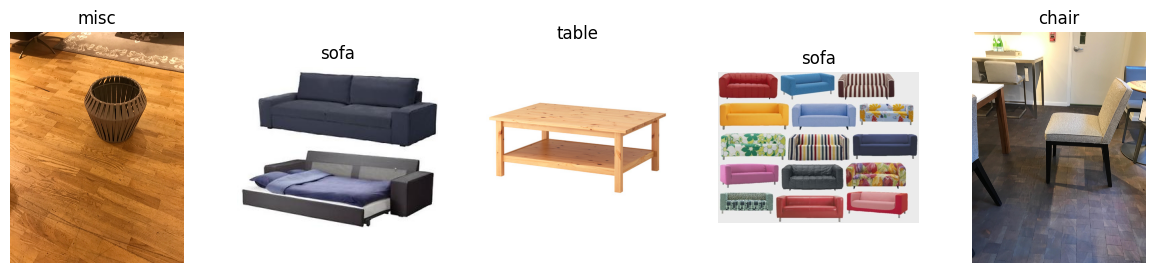

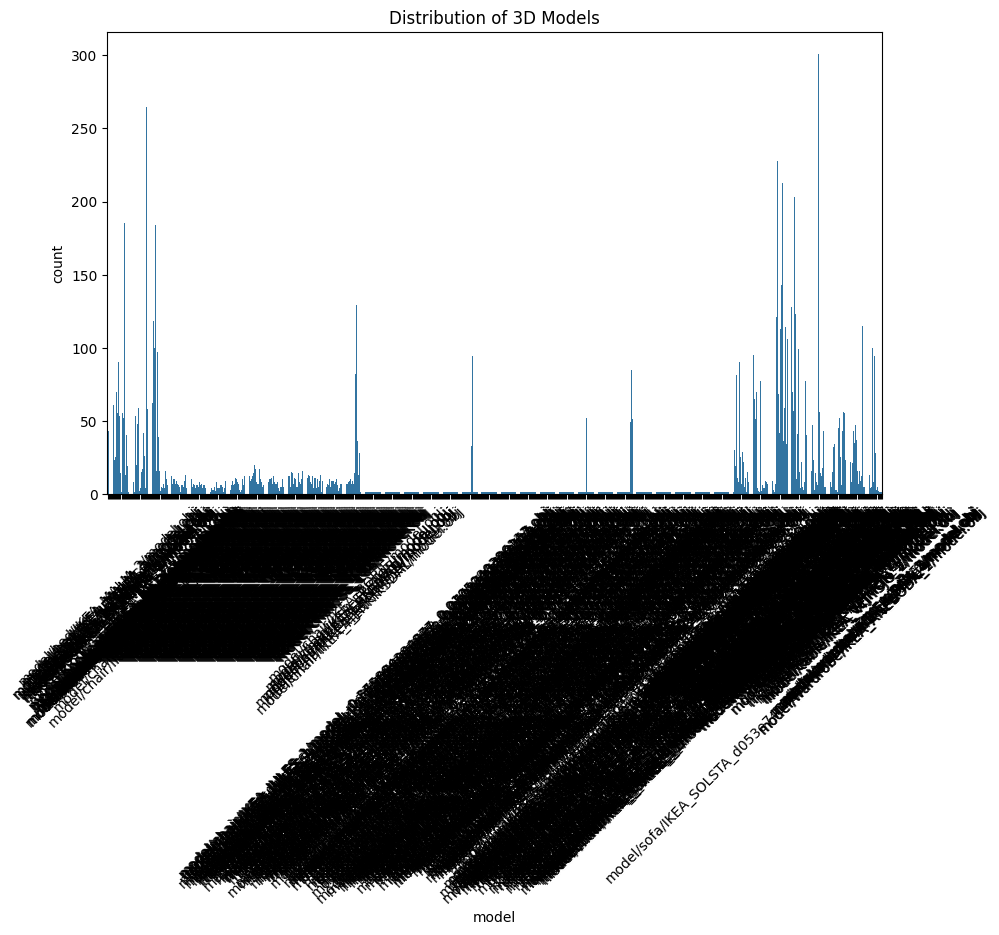

In [3]:
with open('pix3d.json', 'r') as file:
    pix3d_data = json.load(file)

pix3d_df = pd.json_normalize(pix3d_data)

print("Dataset Info:")
print(pix3d_df.info())

print("\nSample Rows:")
print(pix3d_df.head())

print("\nBasic Statistics:")
print(pix3d_df.describe())

print("\nData Types and Missing Values:")
print(pix3d_df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.countplot(data=pix3d_df, x='category')
plt.title("Distribution of Object Types")
plt.xticks(rotation=45)
plt.show()

if 'img_size.width' in pix3d_df.columns and 'img_size.height' in pix3d_df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(pix3d_df['img_size.width'], pix3d_df['img_size.height'], alpha=0.5)
    plt.title("Image Size Distribution")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.show()

if 'theta' in pix3d_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(pix3d_df['theta'], bins=20)
    plt.title("Distribution of Theta (View Angles)")
    plt.xlabel("Theta")
    plt.ylabel("Frequency")
    plt.show()

def show_sample_images(category=None, num_samples=5):
    samples = pix3d_df if category is None else pix3d_df[pix3d_df['category'] == category]
    samples = samples.sample(num_samples)
    
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(samples.iterrows()):
        img_path = row['img']
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(row['category'])
    plt.show()

show_sample_images(num_samples=5)

if 'model' in pix3d_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=pix3d_df, x='model')
    plt.title("Distribution of 3D Models")
    plt.xticks(rotation=45)
    plt.show()


In [5]:
pix3d_df

,img,category,img_size,2d_keypoints,mask,img_source,model,model_raw,model_source,3d_keypoints,voxel,rot_mat,trans_mat,focal_length,cam_position,inplane_rotation,truncated,occluded,slightly_occluded,bbox
0,img/bed/0001.png,bed,"[395, 244]","[[[182.5, 147.09375], [174.5, 225.09375], [16....",mask/bed/0001.png,ikea,model/bed/IKEA_MALM_2/model.obj,None,ikea,model/bed/IKEA_MALM_2/3d_keypoints.txt,model/bed/IKEA_MALM_2/voxel.mat,"[[0.7813941591465821, 0.00095539348511137, -0....","[-0.00024347016915001151, 0.09068297313399999,...",35.270398,"[-0.7062195301276326, 0.2367305448542897, -0.8...",-0.078517,False,False,False,"[4, 22, 362, 228]"
1,img/bed/0002.png,bed,"[1007, 599]","[[[309.29285714285714, 543.9148660714286], [-1...",mask/bed/0002.png,ikea,model/bed/IKEA_MALM_2/model.obj,None,ikea,model/bed/IKEA_MALM_2/3d_keypoints.txt,model/bed/IKEA_MALM_2/voxel.mat,"[[0.6331473196939317, 0.08400992130502279, -0....","[0.025652375712099995, 0.0434050556712, 1.1086...",32.378901,"[-0.8365679093356918, 0.3969797870961433, -0.6...",-0.107273,True,True,False,"[46, 47, 927, 599]"
2,img/bed/0003.png,bed,"[372, 292]","[[[308.0, 202.09375], [-1.0, -1.0], [-1.0, -1....",mask/bed/0003.png,ikea,model/bed/IKEA_HEMNES_1/model.obj,None,ikea,model/bed/IKEA_HEMNES_1/3d_keypoints.txt,model/bed/IKEA_HEMNES_1/voxel.mat,"[[0.9337851369875168, 0.004246139989357373, -0...","[0.05160487022685999, 0.0022441725076000067, 0...",39.511348,"[-0.33341418148967134, 0.18052455616467913, -0...",-0.019073,True,False,False,"[0, 33, 344, 292]"
3,img/bed/0004.png,bed,"[1063, 755]","[[[230.06357142857144, 399.5266517857143], [93...",mask/bed/0004.png,ikea,model/bed/IKEA_HEMNES_1/model.obj,None,ikea,model/bed/IKEA_HEMNES_1/3d_keypoints.txt,model/bed/IKEA_HEMNES_1/voxel.mat,"[[0.5029912563246631, 0.09073372306215703, -0....","[0.02463177822849999, 0.0738148517616, 1.09891...",31.871608,"[-0.9464253871842163, 0.2661593054097636, -0.4...",-0.120969,False,False,False,"[89, 74, 984, 738]"
4,img/bed/0005.png,bed,"[414, 449]","[[[-1.0, -1.0], [-1.0, -1.0], [-1.0, -1.0], [4...",mask/bed/0005.png,ikea,model/bed/IKEA_MALM_2/model.obj,None,ikea,model/bed/IKEA_MALM_2/3d_keypoints.txt,model/bed/IKEA_MALM_2/voxel.mat,"[[0.7883156484286317, -0.04024974826747893, 0....","[-0.205655543756, 0.057996630364799975, 1.6363...",89.131102,"[1.1526451872054488, 0.3727803200217579, -1.12...",-0.083036,True,False,True,"[38, 44, 414, 420]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10064,img/wardrobe/0239.jpg,wardrobe,"[500, 500]","[[[196.0, 37.09375], [268.0, 29.09375], [312.0...",mask/wardrobe/0239.png,internet,model/wardrobe/IKEA_PAX_3/model.obj,None,ikea,model/wardrobe/IKEA_PAX_3/3d_keypoints.txt,model/wardrobe/IKEA_PAX_3/voxel.mat,"[[0.8671943915986312, 0.008398518548578844, -0...","[0.00031610186885999925, -0.004190586852552, 1...",56.579773,"[-0.9892567666445963, 0.18039947720639815, -1....",0.008705,False,False,False,"[192, 25, 307, 476]"
10065,img/wardrobe/0240.jpg,wardrobe,"[500, 500]","[[[78.72729492, 56.09660339], [108.7272949, 54...",mask/wardrobe/0240.png,internet,model/wardrobe/IKEA_PAX_4/model.obj,None,ikea,model/wardrobe/IKEA_PAX_4/3d_keypoints.txt,model/wardrobe/IKEA_PAX_4/voxel.mat,"[[0.8537182493805817, 0.003437021039660772, -0...","[0.018082997613680003, 0.009325893335790002, 2...",69.363343,"[-1.069822307920201, 0.2115633698665138, -1.71...",-0.006371,False,False,False,"[67, 35, 427, 473]"
10066,img/wardrobe/0241.jpg,wardrobe,"[720, 960]","[[[235.2, 651.5571428571429], [491.65714285714...",mask/wardrobe/0241.png,ikea,model/wardrobe/IKEA_ANEBODA_1/model.obj,None,ikea,model/wardrobe/IKEA_ANEBODA_1/3d_keypoints.txt,model/wardrobe/IKEA_ANEBODA_1/voxel.mat,"[[0.9996163484519796, -0.005418352840159608, 0...","[0.008426788430139984, 0.12617876966199998, 2....",65.977675,"[0.0488976167628434, 0.4217906354965945, -2.02...",-0.061166,False,False,False,"[196, 58, 518, 716]"
10067,img/wardrobe/0242.jpg,wardrobe,"[500, 500]","[[[152.53125, 46.7265625], [3

In [9]:
with open('pix3d.json', 'r') as file:
    pix3d_data = json.load(file)
print("Keys in the JSON data:", pix3d_data[0].keys())

Keys in the JSON data: dict_keys(['img', 'category', 'img_size', '2d_keypoints', 'mask', 'img_source', 'model', 'model_raw', 'model_source', '3d_keypoints', 'voxel', 'rot_mat', 'trans_mat', 'focal_length', 'cam_position', 'inplane_rotation', 'truncated', 'occluded', 'slightly_occluded', 'bbox'])


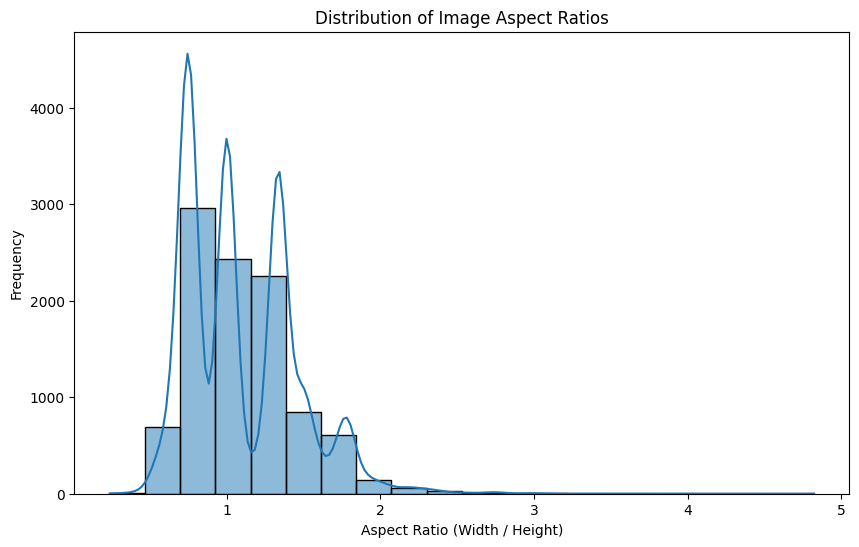

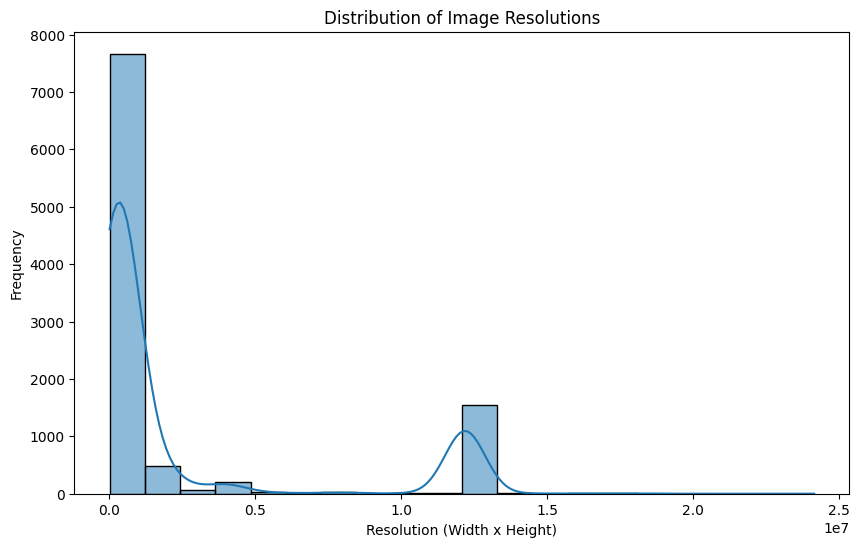

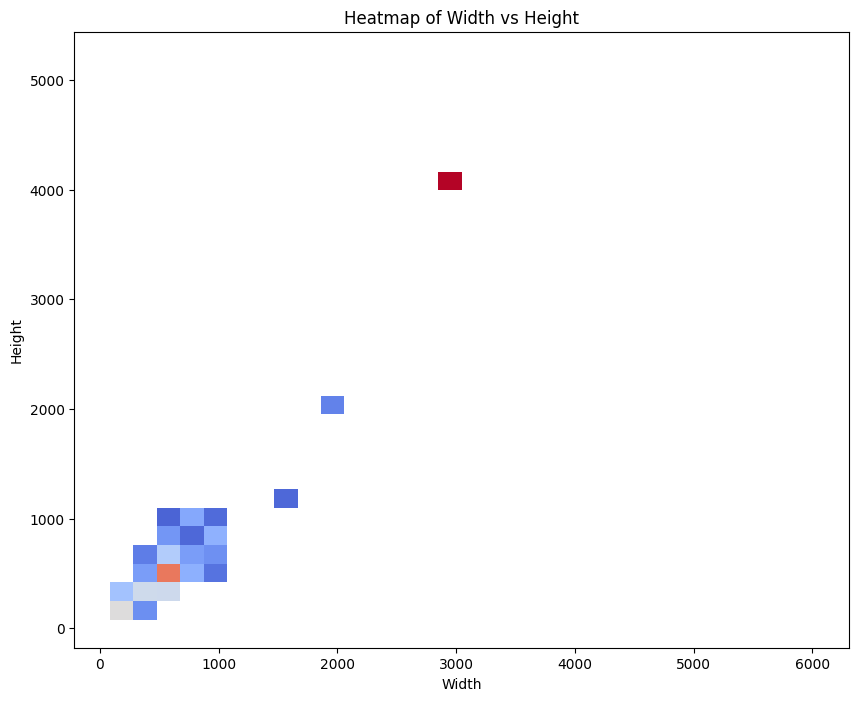

In [11]:
pix3d_df[['width', 'height']] = pd.DataFrame(pix3d_df['img_size'].tolist(), index=pix3d_df.index)

pix3d_df['aspect_ratio'] = pix3d_df['width'] / pix3d_df['height']

plt.figure(figsize=(10, 6))
sns.histplot(pix3d_df['aspect_ratio'], bins=20, kde=True)
plt.title("Distribution of Image Aspect Ratios")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.show()

pix3d_df['resolution'] = pix3d_df['width'] * pix3d_df['height']
plt.figure(figsize=(10, 6))
sns.histplot(pix3d_df['resolution'], bins=20, kde=True)
plt.title("Distribution of Image Resolutions")
plt.xlabel("Resolution (Width x Height)")
plt.ylabel("Frequency")
plt.show()
